In [1]:
# Importação das lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataframe
df = pd.read_csv('../data/unicorns-till-sep-2022.csv')

In [3]:
# primeiros registros e dimensao

primeirosRegistros = df.head()
df.shape

(1186, 7)

In [4]:
# renames

df.columns = df.columns.str.strip()
df.rename(columns={
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor ($B)',
    'Date Joined': 'Data de entrada',
    'Country': 'País',
    'City': 'Cidade',
    'Industry': 'Industria',
    'Investors': 'Investidores'
}, inplace=True)

df



,Empresa,Valor ($B),Data de entrada,País,Cidade,Industria,Investidores
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1181,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1182,FourKites,$1,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1183,VulcanForms,$1,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1184,SingleStore,$1,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"


In [5]:
df['Data de entrada'] = pd.to_datetime(df['Data de entrada'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Empresa          1186 non-null   object        
 1   Valor ($B)       1186 non-null   object        
 2   Data de entrada  1186 non-null   datetime64[ns]
 3   País             1186 non-null   object        
 4   Cidade           1186 non-null   object        
 5   Industria        1186 non-null   object        
 6   Investidores     1168 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 65.0+ KB


In [6]:
df.isnull().sum()

Empresa             0
Valor ($B)          0
Data de entrada     0
País                0
Cidade              0
Industria           0
Investidores       18
dtype: int64

<Axes: title={'center': 'Analisando valores nulos'}>

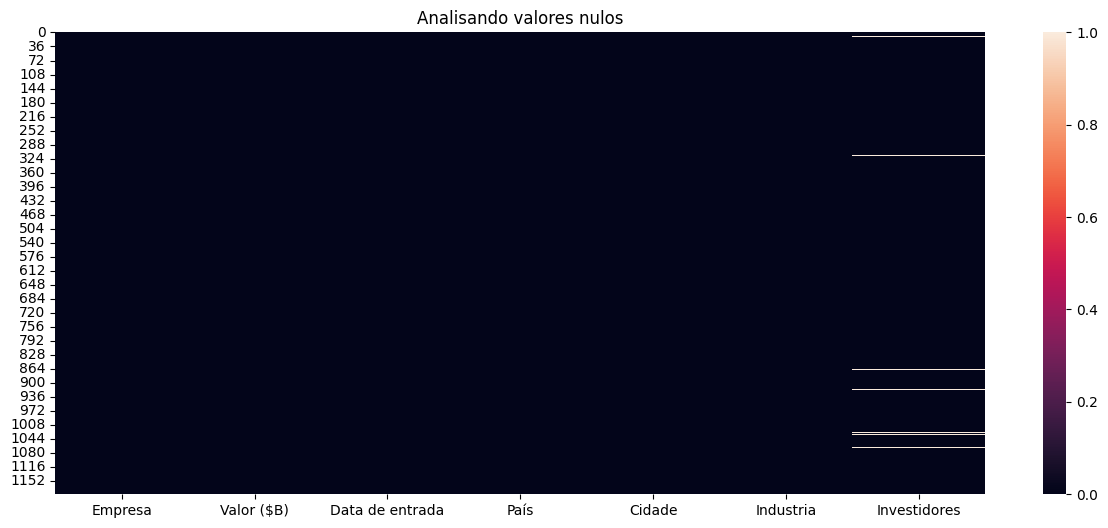

In [7]:
plt.figure(figsize=(15,6))
plt.title("Analisando valores nulos")
sns.heatmap(df.isnull())

In [8]:
# df.nunique()
df['Industria'].value_counts()

Industria
Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Other                                                                  65
Supply chain, logistics, & delivery                                    65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail           

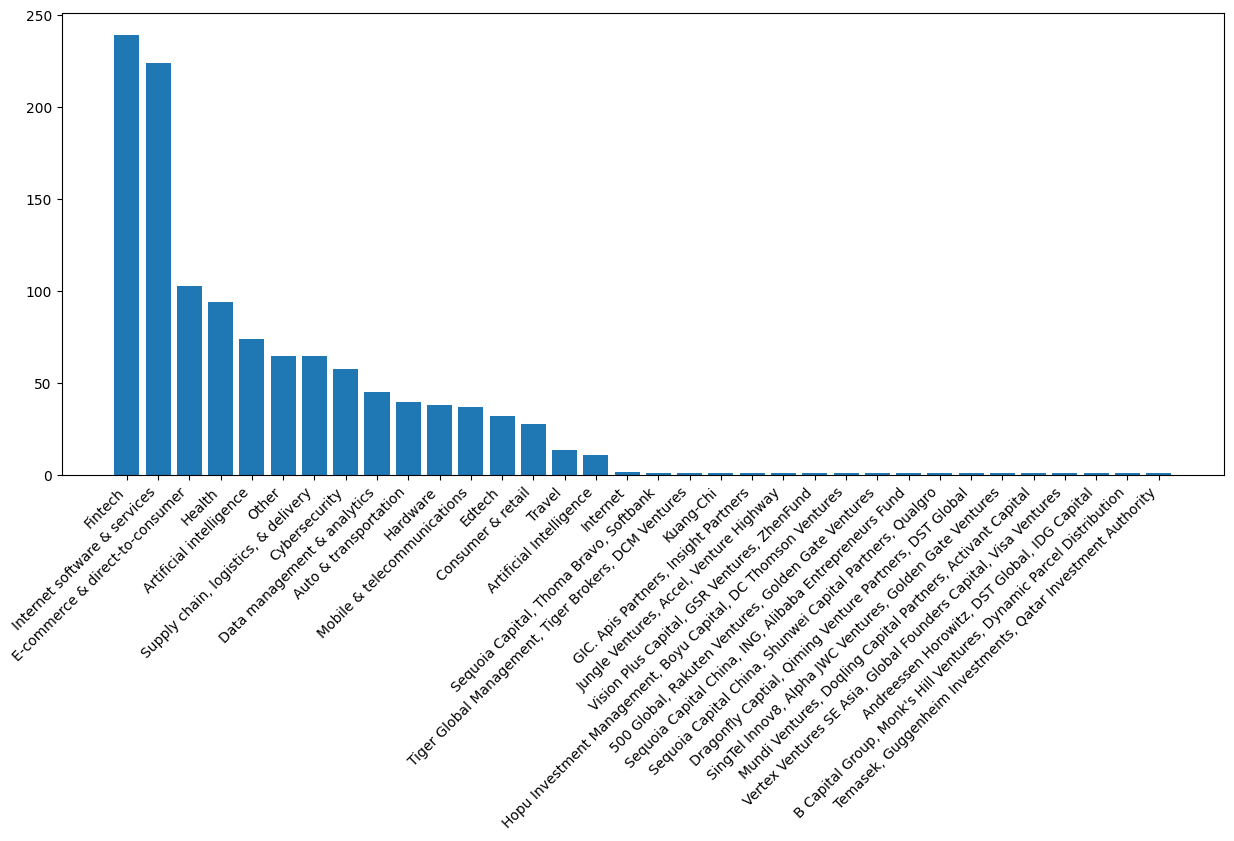

In [9]:
# Visualização
plt.figure(figsize=(15,6))
plt.bar(df['Industria'].value_counts().index, df['Industria'].value_counts())
plt.xticks(rotation=45, ha='right');

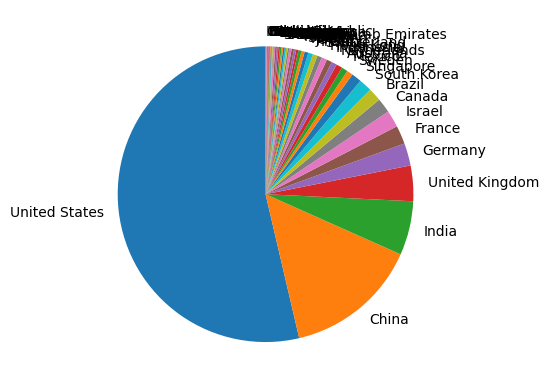

In [10]:
analise = round(df['País'].value_counts(normalize=True) * 100, 2)
plt.pie(
    analise,
    labels=analise.index,
    startangle=90,
    autopct=''
);

<Axes: xlabel='País'>

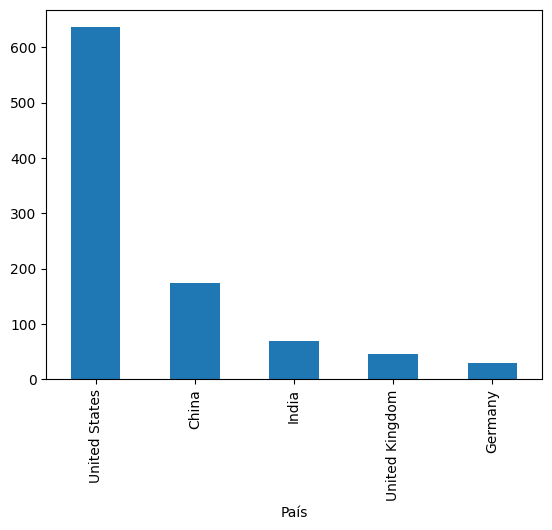

In [11]:
MaioresFundadores = df['País'].value_counts().head()
MaioresFundadores.plot(kind='bar')

In [ ]:
# rank das empresas
investidores = df['Investidores']

0       Sequoia Capital China, SIG Asia Investments, S...
1       Founders Fund, Draper Fisher Jurvetson, Rothen...
2       Tiger Global Management, Sequoia Capital China...
3             Khosla Ventures, LowercaseCapital, capitalG
4       Sequoia Capital China, Blackbird Ventures, Mat...
                              ...                        
1181    Gaja Capital Partners, Stakeboat Capital, West...
1182    Hyde Park Venture Partners, Bain Capital Ventu...
1183    Eclipse Ventures, D1 Capital Partners, Industr...
1184              Google Ventures, Accel, Data Collective
1185                Boost VC, Draper Associates, Gaingels
Name: Investidores, Length: 1186, dtype: object

In [ ]:
df['mes'] = pd.DatetimeIndex(df['Data de entrada']).month
df['ano'] = pd.DatetimeIndex(df['Data de entrada']).year


,Empresa,Valor ($B),Data de entrada,País,Cidade,Industria,Investidores,mes,ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
...,...,...,...,...,...,...,...,...,...
1181,LeadSquared,$1,2022-06-21,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",6,2022
1182,FourKites,$1,2022-06-21,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu...",6,2022
1183,VulcanForms,$1,2022-07-05,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr...",7,2022
1184,SingleStore,$1,2022-07-12,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective",7,2022


In [32]:
df

,Empresa,Valor ($B),Data de entrada,País,Cidade,Industria,Investidores
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1181,LeadSquared,$1,2022-06-21,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1182,FourKites,$1,2022-06-21,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1183,VulcanForms,$1,2022-07-05,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1184,SingleStore,$1,2022-07-12,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"
